# Nonlinear dynamics system
## Definition Linear/nonlinear function
     Linear function f(x) is one which satisfies both of the following properties:
     1) Principle of superposition: f(x + y) = f(x) + f(y)
     2) Homogeneity: f(alpha * x) = alpha * f(x)
     Example nonlinear differential equation: du/dx = -u^2
  
 
     

In [100]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D

In [97]:
t = np.linspace(0, 1, 100)
x = 3 * np.exp(-2*t)
y = 0.5 * np.exp(t)

In [77]:
X = np.stack((x, y), axis=-1)
print(X[0:7])

[[3.         0.5       ]
 [2.94000202 0.5050761 ]
 [2.88120396 0.51020373]
 [2.82358182 0.51538342]
 [2.76711209 0.52061569]
 [2.71177171 0.52590109]
 [2.6575381  0.53124014]]


In [78]:
model = ps.SINDy(
    differentiation_method=ps.FiniteDifference(order=2),
    feature_library=ps.FourierLibrary(),
    optimizer=ps.STLSQ(threshold=0.2),
    feature_names=["x", "y"]
)
model.fit(X, t)
model.print()

(x)' = 0.772 sin(1 x) + 2.097 cos(1 x) + -2.298 sin(1 y) + -3.115 cos(1 y)
(y)' = 1.362 sin(1 y) + -0.222 cos(1 y)


In [98]:
def func(t, X):
    x, y = X
    return (-2*x, y)

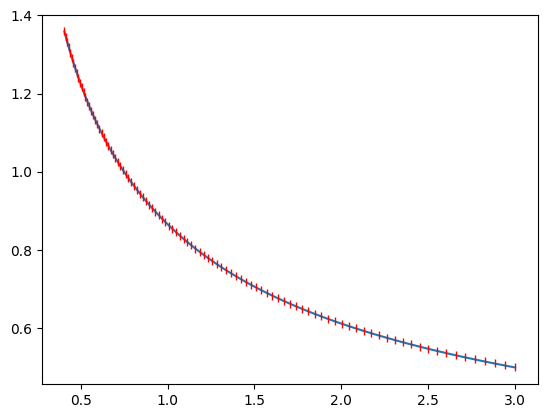

In [99]:
res = scipy.integrate.solve_ivp(func, [0, 1], (3, 0.5), 'RK45', t)
plt.plot(res.y[0], res.y[1])
plt.plot(x, y, 'r|')

In [82]:
def plot_simulation(model, x0, y0, t=np.linspace(0, 1, 100), true_sol = None): # using true_sol as numerical solution
    plt.figure(figsize=(6, 4))
    if len(true_sol) != 0:
        plt.plot(true_sol[0], true_sol[1], label="Ground truth", linewidth=4)
    sim = model.simulate([x0, y0], t=t)
    #print(sim)
    plt.plot(sim[:, 0], sim[:, 1], "--", label="SINDy estimate", linewidth=3)
    plt.plot(x0, y0, "ko", label="Initial condition", markersize=8)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

In [83]:
model_1 = ps.SINDy(
    differentiation_method=ps.FiniteDifference(order=2),
    feature_library=ps.PolynomialLibrary(degree=1),
    optimizer=ps.STLSQ(threshold=0.2),
    feature_names=["x", "y"]
)
model_1.fit(X, t=t)
model_1.print()

(x)' = -2.000 x
(y)' = 1.000 y


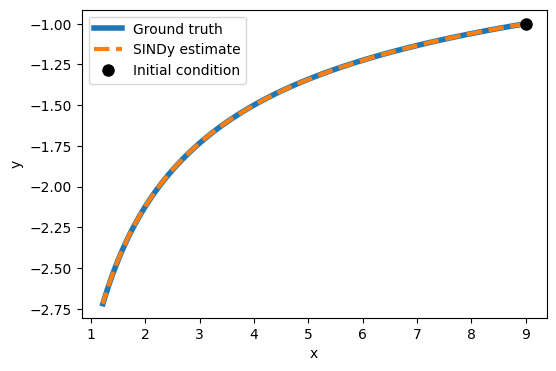

In [85]:
x0 = 9
y0 = -1
plot_simulation(model_1, x0, y0, t, res.y)
res = scipy.integrate.solve_ivp(func, [0, 1], (x0, y0), 'RK45', t) # default integrate RK45
#plt.plot(res.y[0], res.y[1])

# Second example (myself sample)
    12 U'' - 5 U = -7
    the first step i soleved the system with use scipy.integrate, numerical method RK45

In [87]:
def func(t, X):
    x, y = X
    return [y, (-7 + 5 * y) / 12]

In [103]:
y0 = x0 = 0
res = scipy.integrate.solve_ivp(func, [0, 1], (x0, y0), 'RK45', t) # default integrate RK45

In [89]:
x = res.y[0]
y = res.y[1]
X = np.stack((x, y), axis=-1)

In [91]:
model_2 = ps.SINDy(
    differentiation_method=ps.FiniteDifference(order=2),
    feature_library=ps.PolynomialLibrary(degree=2),
    optimizer=ps.STLSQ(threshold=0.2),
    feature_names=["x", "y"]
)

(x)' = 1.000 y
(y)' = -0.583 1 + 0.417 y


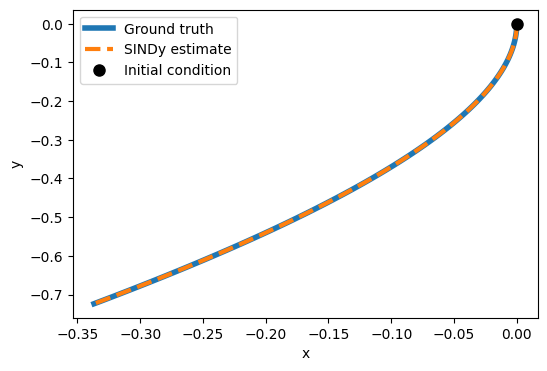

In [93]:
model_2.fit(X, t)
model_2.print()
plot_simulation(model_2, x0, y0, t, res.y)

# About Lorenz system
![The first](Lorenz_system.png "Title")
    On the image we can see the model is a system of three ordinary differential equations now known as the Lorenz equations
    

In [101]:
def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

In [102]:
## Initial conditions
rho = 28.0
sigma = 
beta = 8.0 / 3.0
dt = 0.01
## -10.0 * (x - y)
## x * (28.0 - z) - y
## x * y - 8.0 / 3.0 * z

state0 = [1.0, 1.0, 1.0]
time_steps = np.arange(0.0, 40.0, dt)

x_train = scipy.integrate.odeint(f, state0, time_steps, meth)

In [108]:
model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.05),
    feature_library=ps.PolynomialLibrary(degree=2),
)
model.fit(x_train, time_steps)
model.print()

(x0)' = -9.977 x0 + 9.977 x1
(x1)' = 27.807 x0 + -0.962 x1 + -0.995 x0 x2
(x2)' = -2.659 x2 + 0.997 x0 x1


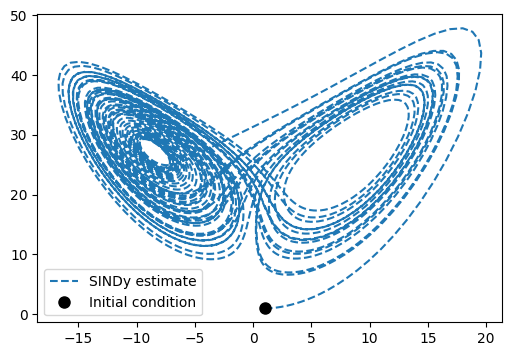

In [111]:
x_sim = model.simulate(state0, time_steps)
plt.figure(figsize=(6, 4))
#plt.plot(x_train[:, 0], x_train[:, 2], label='Ground truth')
plt.plot(x_sim[:, 0], x_sim[:, 2], '--', label='SINDy estimate')
plt.plot(x_train[0, 0], x_train[0, 2], "ko", label="Initial condition", markersize=8)
plt.legend()
plt.draw()
plt.show()

# Вывод:
    Алгоритм, зная временной ряд, восстанавливает систему дифференциальных уравнений. Нужно посчитать ошибку вычислений восстановленной системы и истенного решения (не графически). На Аттракторе Лоренца пока выводов нет